In [2]:
import numpy as np
from matplotlib import pyplot as plt

import csv
import sys
ROOT = "../../"
sys.path.append(ROOT) # Add root directory to path

# CIFAR-10 Results

In [107]:
experiment_log_folder_path = ROOT + "notebooks/experiment_log/"
inf = float('inf')
eps_val = 0.025

random_filename = "FRESH_CNN_CIFAR_10_4.csv"
random_perturbations = []
random_test_accuracies = []
random_adversarial_accuracies = []

with open(experiment_log_folder_path + random_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        random_perturbations.append(eval(row['perturbations']))
        random_test_accuracies.append(float(row['baseline_test_accuracy']))
        random_adversarial_accuracies.append(float(row[f'adversarial_accuracy_eps={eps_val}']))

fixed_filename = "FRESH_CNN_CIFAR_10_4_NoShuffle.csv"
fixed_perturbations = []
fixed_test_accuracies = []
fixed_adversarial_accuracies = []

with open(experiment_log_folder_path + fixed_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        fixed_perturbations.append(eval(row['perturbations']))
        fixed_test_accuracies.append(float(row['baseline_test_accuracy']))
        fixed_adversarial_accuracies.append(float(row[f'adversarial_accuracy_eps={eps_val}']))

test_accuracies_difference_shuffling = [fixed_test_accuracies[i] - random_test_accuracies[i] for i in range(len(fixed_test_accuracies))]
adversarial_accuracies_difference_shuffling = [fixed_adversarial_accuracies[i] - random_adversarial_accuracies[i] for i in range(len(fixed_adversarial_accuracies))]
average_test_accuracy_diff_shuffling = np.mean(test_accuracies_difference_shuffling)
average_adversarial_accuracy_diff_shuffling = np.mean(adversarial_accuracies_difference_shuffling)
std_test_accuracy_diff_shuffling = np.std(test_accuracies_difference_shuffling)
std_adversarial_accuracy_diff_shuffling = np.std(adversarial_accuracies_difference_shuffling)

IO_filename = "FRESH_CNN_CIFAR_10_4_IncludeOriginal.csv"
IO_perturbations = []
IO_test_accuracies = []
IO_adversarial_accuracies = []

with open(experiment_log_folder_path + IO_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        IO_perturbations.append(eval(row['perturbations']))
        IO_test_accuracies.append(float(row['baseline_test_accuracy']))
        IO_adversarial_accuracies.append(float(row[f'adversarial_accuracy_eps={eps_val}']))

test_accuracies_difference_IO = [IO_test_accuracies[i] - random_test_accuracies[i] for i in range(len(fixed_test_accuracies))]
adversarial_accuracies_difference_IO = [IO_adversarial_accuracies[i] - random_adversarial_accuracies[i] for i in range(len(fixed_adversarial_accuracies))]
average_test_accuracy_diff_IO = np.mean(test_accuracies_difference_IO)
average_adversarial_accuracy_diff_IO = np.mean(adversarial_accuracies_difference_IO)
std_test_accuracy_diff_IO = np.std(test_accuracies_difference_IO)
std_adversarial_accuracy_diff_IO = np.std(adversarial_accuracies_difference_IO)

single_filename = "FRESH_CNN_CIFAR_10_3.csv"
single_perturbations = []
single_test_accuracies = []
single_adversarial_accuracies = []

with open(experiment_log_folder_path + single_filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        single_perturbations.append(eval(row['perturbations']))
        single_test_accuracies.append(float(row['baseline_test_accuracy']))
        single_adversarial_accuracies.append(float(row[f'adversarial_accuracy_eps={eps_val}']))

perturbation_number = [len(perturbations) for perturbations in random_perturbations]

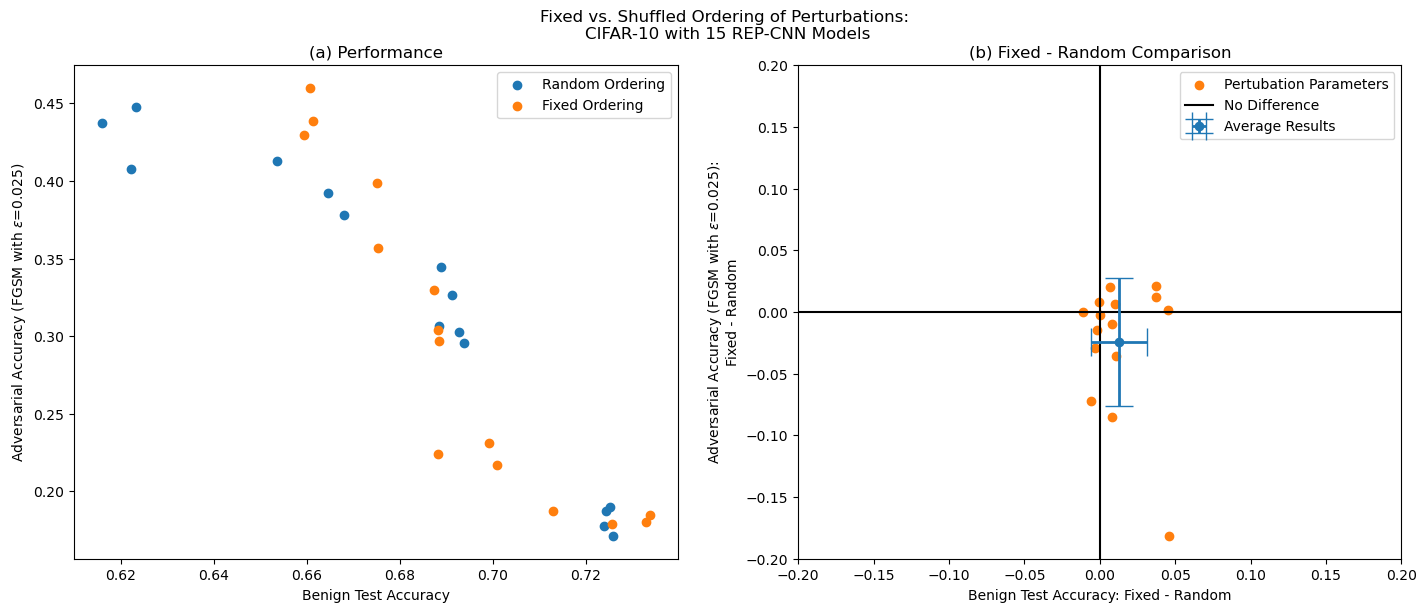

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle(f"Fixed vs. Shuffled Ordering of Perturbations: \nCIFAR-10 with {len(random_test_accuracies)} REP-CNN Models")
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

axs[0].scatter(random_test_accuracies, random_adversarial_accuracies, label="Random Ordering")
axs[0].scatter(fixed_test_accuracies, fixed_adversarial_accuracies, label="Fixed Ordering")
axs[0].set_xlabel("Benign Test Accuracy")
axs[0].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$="+f"{eps_val})")
axs[0].set_title("(a) Performance")
axs[0].legend()

axs[1].scatter(test_accuracies_difference_shuffling, adversarial_accuracies_difference_shuffling, color='C1', label="Pertubation Parameters")
axs[1].set_xlabel("Benign Test Accuracy: Fixed - Random")
axs[1].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$="+f"{eps_val}):" + "\nFixed - Random")
axs[1].set_title("(b) Fixed - Random Comparison")
axs[1].set_xlim(-0.2, 0.2)
axs[1].set_ylim(-0.2, 0.2)

axs[1].axhline(0, linestyle="-", c='black', label="No Difference")
axs[1].axvline(0, linestyle="-", c='black')
axs[1].errorbar(average_test_accuracy_diff_shuffling, average_adversarial_accuracy_diff_shuffling,
                xerr=std_test_accuracy_diff_shuffling, yerr=std_adversarial_accuracy_diff_shuffling,
                fmt='o', color='C0', linewidth=2, capsize=10, label="Average Results")
axs[1].legend()
plt.show()

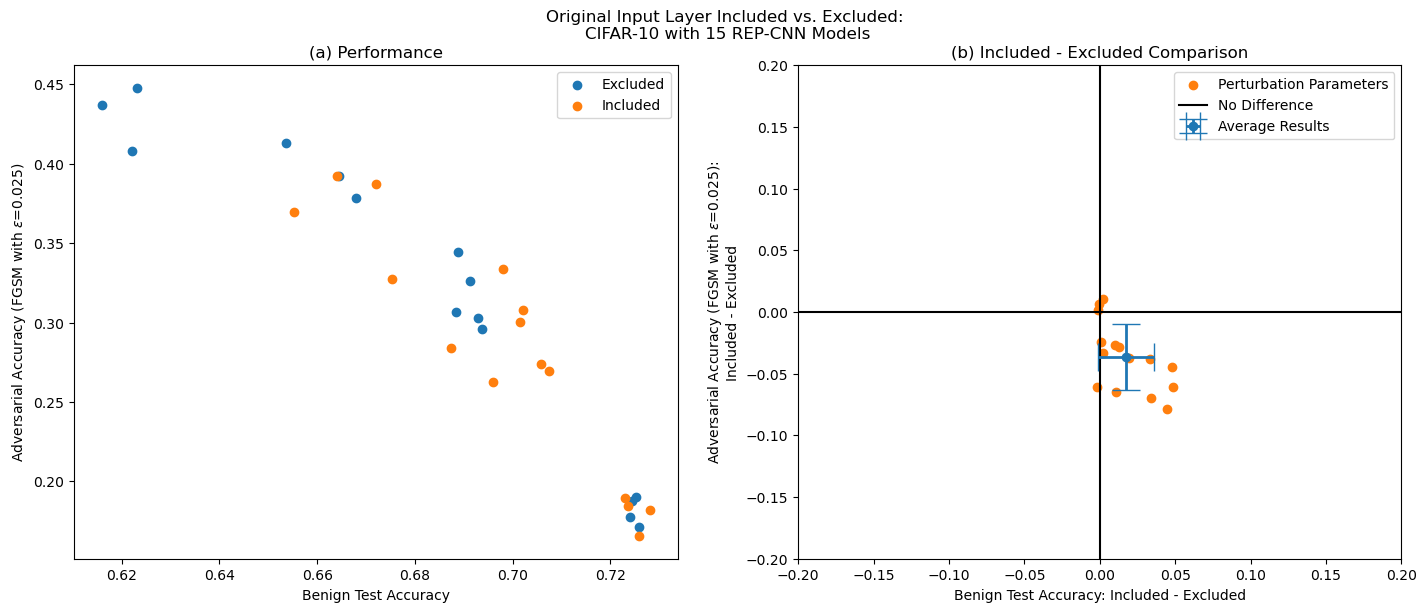

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle(f"Original Input Layer Included vs. Excluded: \nCIFAR-10 with {len(random_test_accuracies)} REP-CNN Models")
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

axs[0].scatter(random_test_accuracies, random_adversarial_accuracies, label="Excluded")
axs[0].scatter(IO_test_accuracies, IO_adversarial_accuracies, label="Included")
axs[0].set_xlabel("Benign Test Accuracy")
axs[0].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$="+f"{eps_val})")
axs[0].set_title("(a) Performance")
axs[0].legend()

axs[1].scatter(test_accuracies_difference_IO, adversarial_accuracies_difference_IO, color='C1', label="Perturbation Parameters")
axs[1].set_xlabel("Benign Test Accuracy: Included - Excluded")
axs[1].set_ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$="+f"{eps_val}):" + "\nIncluded - Excluded")
axs[1].set_title("(b) Included - Excluded Comparison")
axs[1].set_xlim(-0.2, 0.2)
axs[1].set_ylim(-0.2, 0.2)

axs[1].axhline(0, linestyle="-", c='black', label="No Difference")
axs[1].axvline(0, linestyle="-", c='black')
axs[1].errorbar(average_test_accuracy_diff_IO, average_adversarial_accuracy_diff_IO,
                xerr=std_test_accuracy_diff_IO, yerr=std_adversarial_accuracy_diff_IO,
                fmt='o', color='C0', linewidth=2, capsize=10, label="Average Results")
axs[1].legend()
plt.show()

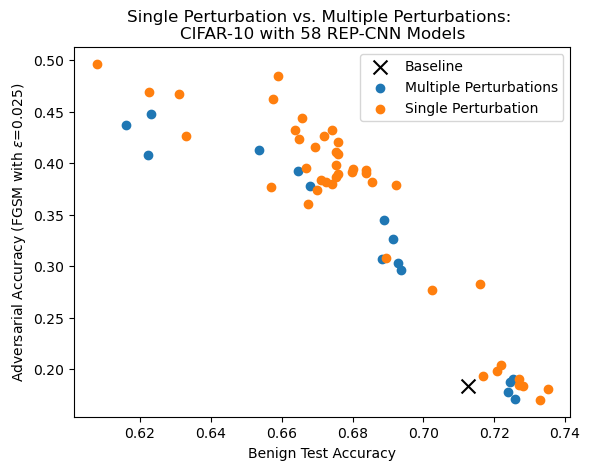

In [127]:
plt.figure()
plt.scatter(single_test_accuracies[0], single_adversarial_accuracies[0], label="Baseline", marker='x', s=100, c='black')
plt.scatter(random_test_accuracies, random_adversarial_accuracies, label="Multiple Perturbations")
plt.scatter(single_test_accuracies[1:], single_adversarial_accuracies[1:], label="Single Perturbation")
plt.xlabel("Benign Test Accuracy")
plt.ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$=0.025)")
plt.title("Single Perturbation vs. Multiple Perturbations: \nCIFAR-10 with 58 REP-CNN Models")
plt.legend()
plt.show()

# MNIST Results

In [25]:
filename = "testing_round_1.csv"
perturbations = []
test_accuracies = []
adversarial_accuracies = []
eps_values = [0.1, 0.2, 0.3, 0.5]
inf = float('inf')

with open(experiment_log_folder_path + filename, 'r') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        perturbations.append(eval(row['perturbations']))
        test_accuracies.append(float(row['baseline_accuracy']))
        adversarial_accuracies.append(eval(row['adversarial_accuracy']))

test_accuracies = np.array(test_accuracies)
adversarial_accuracies = np.array(adversarial_accuracies)
perturbation_numbers = [len(p) for p in perturbations]
perturbation_number_indices = [np.where(perturbation_numbers == i) for i in np.unique(perturbation_numbers)]

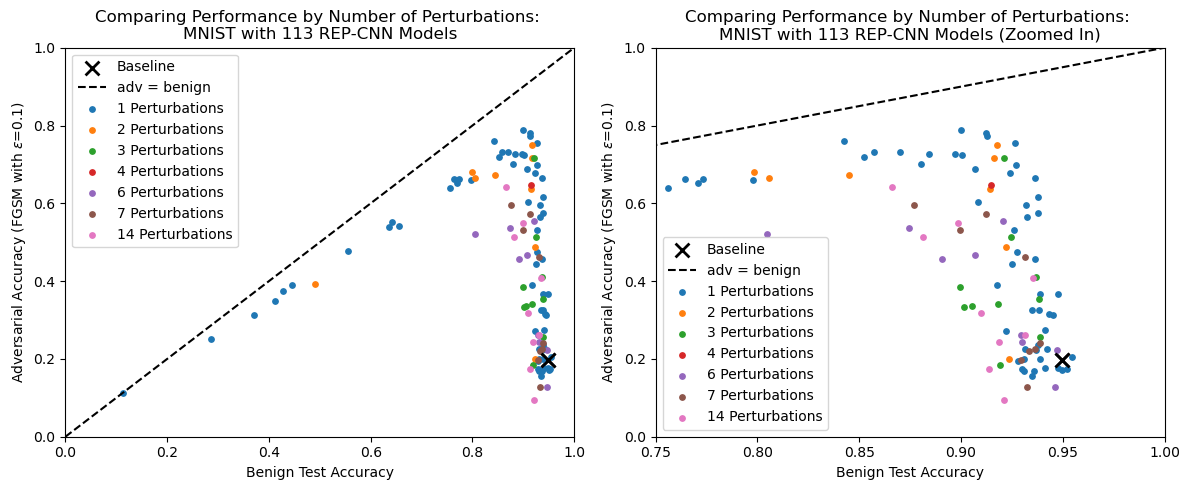

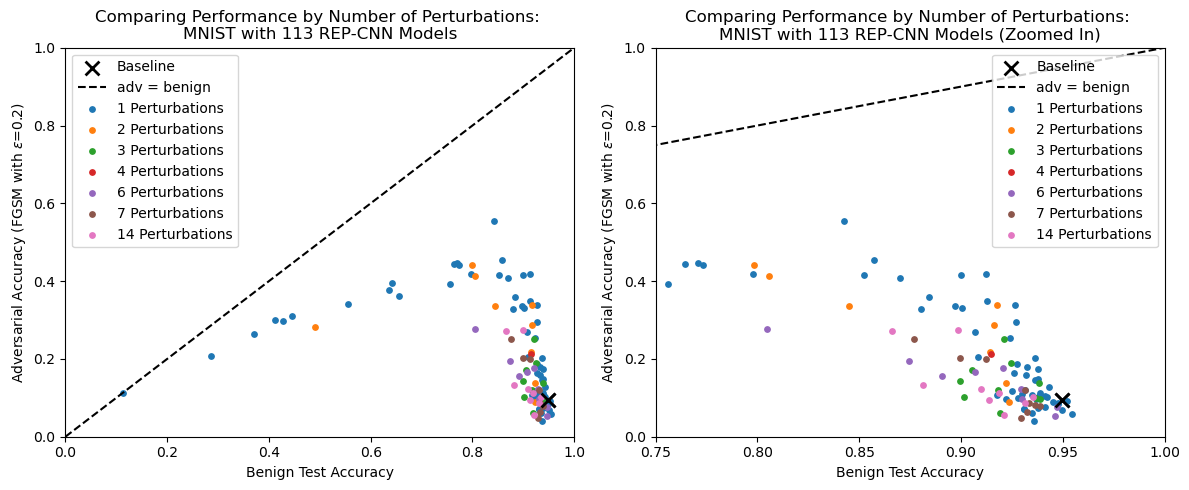

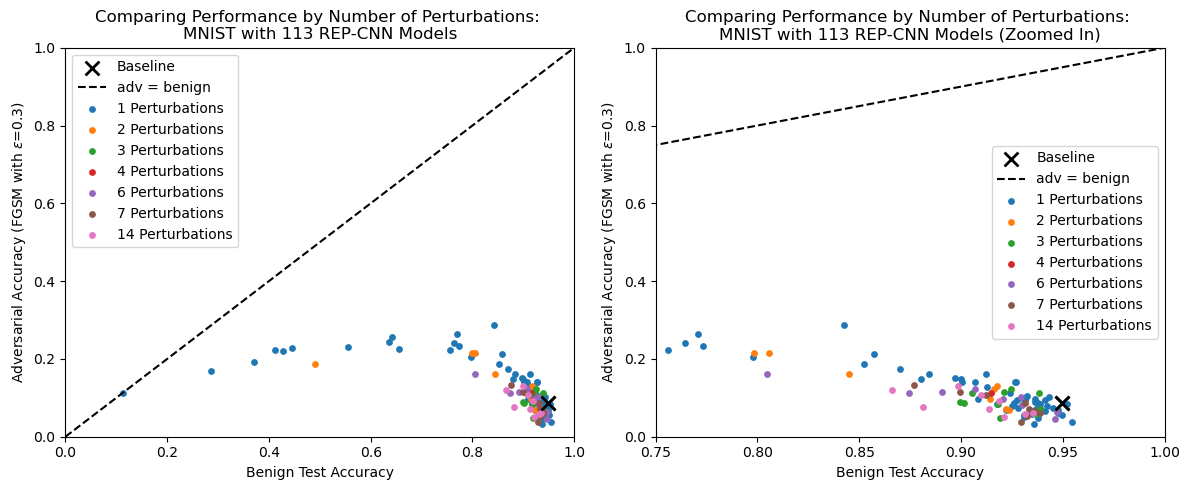

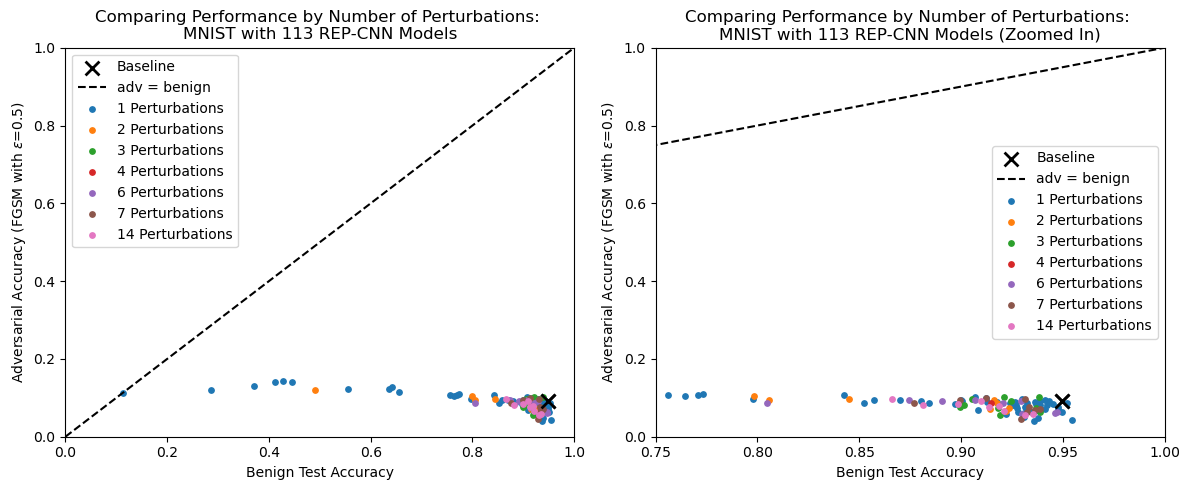

In [121]:
for eps_index in [0, 1, 2, 3]:
    eps = eps_values[eps_index]

    plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

    # Subplot 1: Original plot
    plt.subplot(1, 2, 1)
    plt.scatter(test_accuracies[0], adversarial_accuracies[0, eps_index], label="Baseline", marker='x', s=100, c='black', linewidth=2)
    plt.plot([[0], [1]], linestyle="--", color='black', label="adv = benign")
    for i in range(1, len(np.unique(perturbation_numbers))):
        plt.scatter(test_accuracies[perturbation_number_indices[i]], adversarial_accuracies[perturbation_number_indices[i], eps_index],
                    label=f"{np.unique(perturbation_numbers)[i]} Perturbations", s=15)
    plt.scatter(test_accuracies[0], adversarial_accuracies[0, eps_index], marker='x', s=100, c='black', linewidth=2)
    plt.xlabel("Benign Test Accuracy")
    plt.ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$" + f"={eps})")
    plt.title(f"Comparing Performance by Number of Perturbations: \nMNIST with {len(test_accuracies)} REP-CNN Models")
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.legend()

    # Subplot 2: Plot with adjusted xlim
    plt.subplot(1, 2, 2)
    plt.scatter(test_accuracies[0], adversarial_accuracies[0, eps_index], label="Baseline", marker='x', s=100, c='black', linewidth=2)
    plt.plot([[0], [1]], linestyle="--", color='black', label="adv = benign")
    for i in range(1, len(np.unique(perturbation_numbers))):
        plt.scatter(test_accuracies[perturbation_number_indices[i]], adversarial_accuracies[perturbation_number_indices[i], eps_index],
                    label=f"{np.unique(perturbation_numbers)[i]} Perturbations", s=15)
    plt.scatter(test_accuracies[0], adversarial_accuracies[0, eps_index], marker='x', s=100, c='black', linewidth=2)
    plt.xlabel("Benign Test Accuracy")
    plt.ylabel(r"Adversarial Accuracy (FGSM with $\varepsilon$" + f"={eps})")
    plt.title(f"Comparing Performance by Number of Perturbations: \nMNIST with {len(test_accuracies)} REP-CNN Models (Zoomed In)")
    plt.ylim(0, 1)
    plt.xlim(0.75, 1)
    plt.legend()

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

In [89]:
eps_index = 0
eps = eps_values[eps_index]

# test_adv_gaps = np.array([test_accuracies[i] - adversarial_accuracies[i, eps_index] for i in range(len(test_accuracies))])
test_adv_gaps = test_accuracies - adversarial_accuracies[:, 0]

gaps_by_perturbation_number = [test_adv_gaps[perturbation_number_indices[i]] for i in range(len(perturbation_number_indices))]
gaps_mean = [np.mean(gaps, axis=0) for gaps in gaps_by_perturbation_number]
gaps_std = [np.std(gaps, axis=0) for gaps in gaps_by_perturbation_number]